In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Importing libs
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt

import geopandas
import matplotlib.colors
import pycountry 

# formats

background_color = '#3B5782'
other = '#144082'
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams["font.family"] = "monospace"

# No scientific notations
# https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
pd.options.display.float_format = '{:.2f}'.format
# Number with comma seperation
pd.options.display.float_format = '{:,}'.format

from matplotlib.offsetbox import AnnotationBbox, OffsetImage
def offset_png(x, y, path, ax, zoom, offset):
    '''For adding  .png images to the graph.
    source: https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib'''
    
    img = plt.imread(path)
    im = OffsetImage(img, zoom=zoom)
    im.image.axes = ax
    x_offset = offset
    ab = AnnotationBbox(im, (x, y), xybox=(x_offset, 0), frameon=False,
                        xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)

/kaggle/input/gold-prices/annual_csv.csv
/kaggle/input/gold-prices/monthly_csv.csv
/kaggle/input/brent-oil-prices/BrentOilPrices.csv
/kaggle/input/gold-rocket-icon/free-rocket-icon-1206-thumb.png


In [2]:
def read(filepath) -> pd.DataFrame():
    df = (pd.read_csv(filepath)
          .assign(Date = lambda x: pd.to_datetime(x['Date']),
                  Year = lambda x: (x['Date'].dt.year),
                  Month = lambda x: (x['Date'].dt.month),
                  Percentage_Change = lambda x: x.Price.pct_change()
                 )
          .fillna(0.0)
         )
    return df


gold_fp = '/kaggle/input/gold-prices/monthly_csv.csv'
oil_fp = '/kaggle/input/brent-oil-prices/BrentOilPrices.csv'

df = read(gold_fp) 
oil = read(oil_fp)
          

# Gold

Gold has an allure all over the world. 

This notebook is a brief look at how prices of gold have changed since 1950.

**What can we learn?**

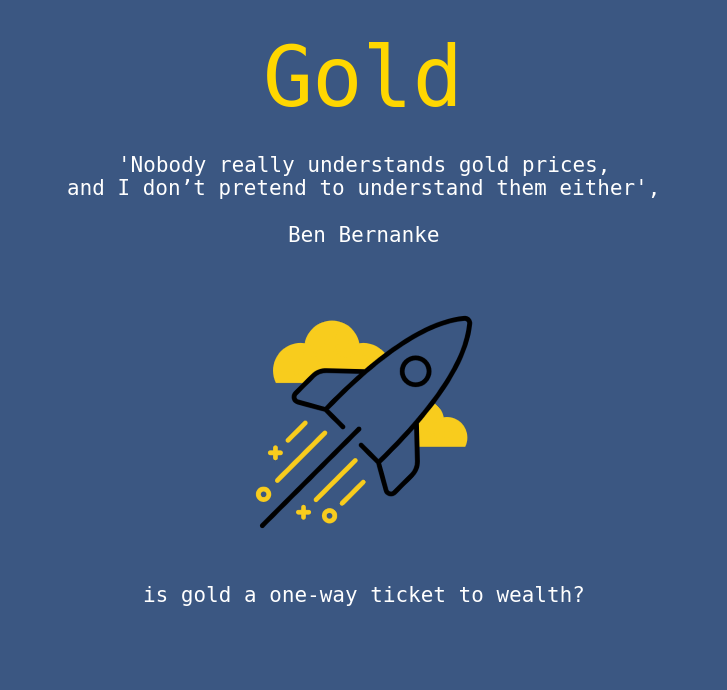

In [3]:
fig = plt.figure(figsize=(6, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')
    
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)

ax0.text(0.5,0.8,"Gold",fontsize=40,color='gold', ha='center')

ax0.text(0.5,0.5,"'Nobody really understands gold prices,\nand I don’t pretend to understand them either',\n\nBen Bernanke", ha='center')

# Picture
path='../input/gold-rocket-icon/free-rocket-icon-1206-thumb.png'
offset_png(x=0.5, y=0.1, path=path, ax=ax0, zoom=0.23, offset=0)

ax0.text(0.5,-0.45,"is gold a one-way ticket to wealth?\n\n\n", ha='center')


plt.show()

# How has the price of gold changed over the years?

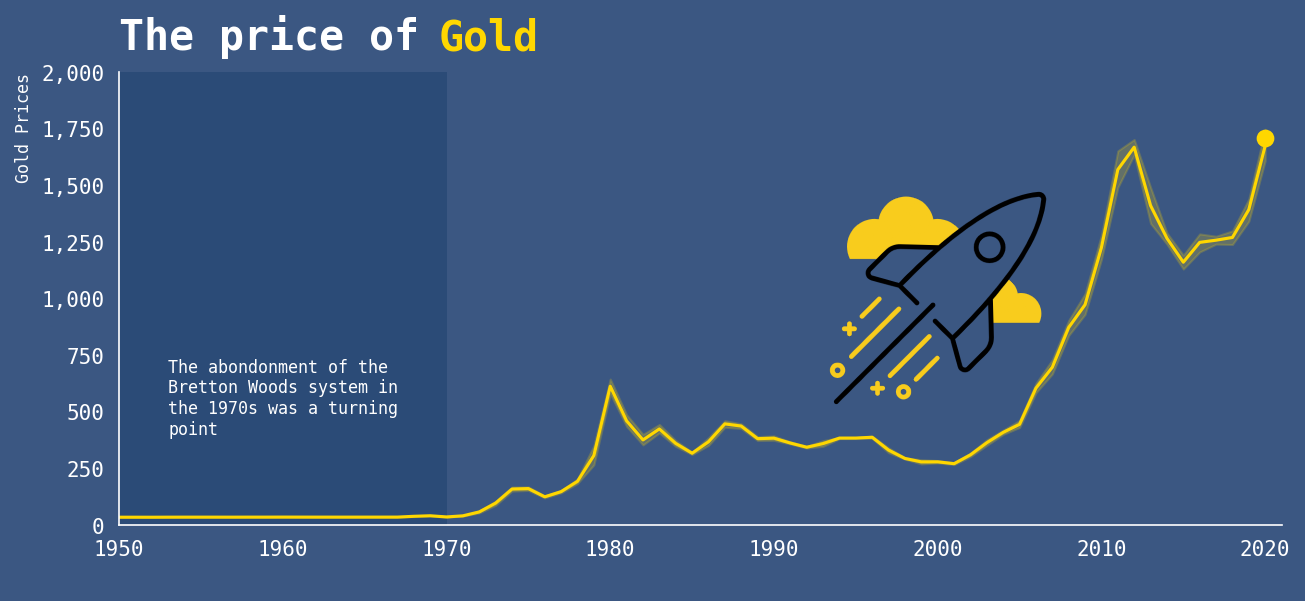

In [4]:
fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

sns.lineplot(x='Year',y='Price',data=df,color='gold', ax=ax0)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set(facecolor=background_color, xlim=(1950,2021), ylim=([0,2000]))
ax0.set_ylabel("Gold Prices",fontsize=8,loc='top', fontfamily='monospace')
ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')

ax0.axvspan(1950, 1970, facecolor='#09305E',alpha=0.3)
    
ax0.text(1950, 2100, 'The price of',fontsize=20, fontweight='bold')
ax0.text(1969.5, 2100, 'Gold',color='gold',fontsize=20, fontweight='bold')

# Picture
path='../input/gold-rocket-icon/free-rocket-icon-1206-thumb.png'
offset_png(x=2000, y=1000, path=path, ax=ax0, zoom=0.23, offset=0)

# Ball
ax0.plot(2020,df['Price'].max()-130, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)

ax0.text(1953,400,
'''
The abondonment of the
Bretton Woods system in
the 1970s was a turning
point''', fontsize=8)

plt.show()

We see that the abandonment of the Bretton Woods system in the 1970's was the start of the wild-ride that gold prices would go on.

However, it was in the 2000's gold prices really **took off!**

# 1970 Onwards

For the purposes of our visualisations, we will focus our attention after 1970. 

Do key events cause fluctuations?

[inspired by: https://www.economist.com/graphic-detail/2020/01/06/the-killing-of-qassem-suleimani-sends-gold-to-a-seven-year-high]

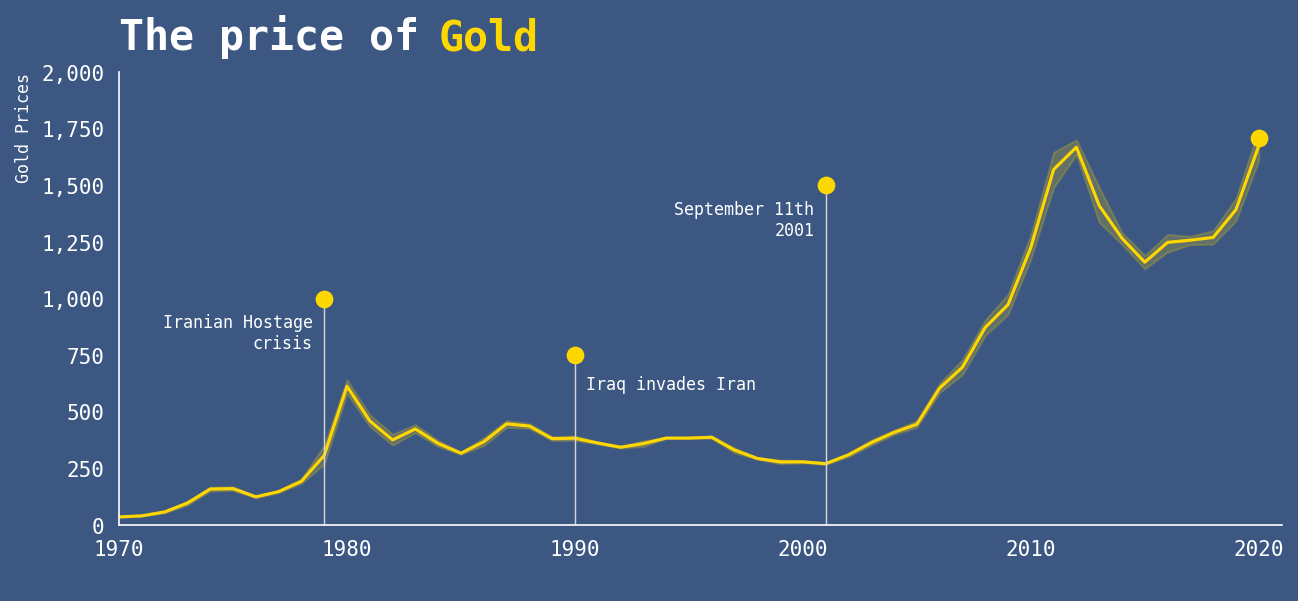

In [5]:
df1970 = df[df['Year']>=1970]

fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

sns.lineplot(x='Year',y='Price',data=df1970,color='gold', ax=ax0)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set(facecolor=background_color, xlim=(1970,2021), ylim=([0,2000]))
ax0.set_ylabel("Gold Prices",fontsize=8,loc='top', fontfamily='monospace')
ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')

    
ax0.text(1970, 2100, 'The price of',fontsize=20, fontweight='bold')
ax0.text(1984, 2100, 'Gold',color='gold',fontsize=20, fontweight='bold')

# Ball
ax0.plot(2020,df['Price'].max()-130, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)

# highlights

ax0.axvline(x=1979, ymin=0, ymax=0.5, color='lightgray',linewidth=0.7)
ax0.plot(1979,1000, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)
ax0.text(1978.5,780,'Iranian Hostage\ncrisis',ha='right',fontsize=8)


ax0.axvline(x=2001, ymin=0, ymax=0.74, color='lightgray',linewidth=0.7)
ax0.plot(2001,1500, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)
ax0.text(2000.5,1280,'September 11th\n2001',ha='right',fontsize=8)


ax0.axvline(x=1990, ymin=0, ymax=0.365, color='lightgray',linewidth=0.7)
ax0.plot(1990,750, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)
ax0.text(1990.5,600,'Iraq invades Iran',ha='left',fontsize=8)


plt.show()

At first glance, these events may not show much impact. 

However, when we zoom in and focus on percentage change, we do see that these and other events **may cause fluctuations in the price of gold**

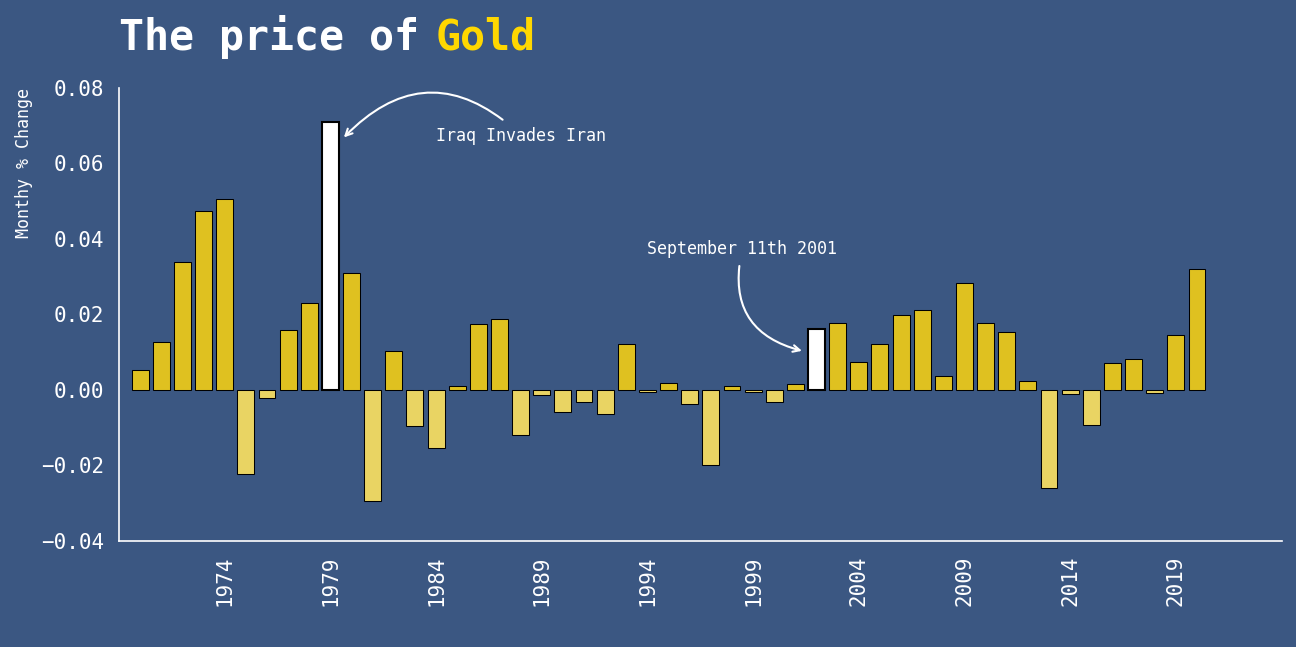

In [6]:
year_temp = df1970.groupby('Year')['Percentage_Change'].mean().reset_index()

fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')

# for colouring negatives differently
year_temp['positive'] = year_temp['Percentage_Change'] > 0

sns.barplot(x='Year',y='Percentage_Change',data=year_temp,palette=year_temp['positive'].map({True: 'gold', False: '#FFE44D'}),ec='black',linewidth=0.5,ci=None,ax=ax0)
    
ax0.set_ylabel("Monthy % Change",fontsize=8,loc='top', fontfamily='monospace')
ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)

ax0.set(facecolor=background_color, xlim=([-1,49.5]), ylim=([-0.04,0.08]))
ax0.xaxis.set_ticks(np.arange(-1, 55,5))

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

plt.xticks(rotation=90)

#for bar in ax0.patches:
 #   if bar.get_height() > 0.06:
  #      bar.set_color('red')    
   # else:
    #    bar.set_color('grey')

#highlights

for i in [9,32]:
    ax0.patches[i].set_color('white')
    ax0.patches[i].set_edgecolor('black')  
    ax0.patches[i].set_linewidth(1)

#ax0.text(14,0.066,'Iraq invades Iran',ha='left',fontsize=8)

plt.annotate('Iraq Invades Iran', xy=(9.5, 0.066), xytext=(14, 0.066),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.5",color='white'), fontsize=8,fontfamily='monospace',ha='left', color='white')

plt.annotate('September 11th 2001', xy=(31.5, 0.01), xytext=(24, 0.036),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.5",color='white'), fontsize=8,fontfamily='monospace',ha='left', color='white')

ax0.text(-1, 0.09, 'The price of',fontsize=20, fontweight='bold')
ax0.text(14, 0.09, 'Gold',color='gold',fontsize=20, fontweight='bold')

plt.show()

While we can't say that these events directly effected the price of gold, they certainly might have!

As Ben Bernake said, "**Nobody really understands gold prices...**"

**but can we predict them?**

# Prophet

I will try to forecast gold prices using Facebook's **Prophet**. This tool specializes in **univariate time-series forecasting**. So let's put it to the test.

As above, I will use **only records post-1970.**

Note that in Prophet, we need to have our columns names 'ds' (dates) and 'y' (the variable we want to predict).

In [7]:
import fbprophet
from fbprophet import Prophet

In [8]:
df_prophet = df1970[['Date', 'Price']]
# Prophet needs columns named 'ds' & 'y', so I'll make those changes too
df_prophet.columns = ['ds','y']

# let's do it properly: Splitting our data

As for any predictive task, we should keep some data separate so that we can put our predictions to the test.

Here, I'll hold out 36 rows, or in other words, 36 months (3 years)

In [9]:
split_date = df_prophet.index.max()-36
train_df, test_df = df_prophet.loc[df_prophet.index <= split_date].set_index(['ds']).copy(), df_prophet.loc[df_prophet.index > split_date].set_index(['ds']).copy()

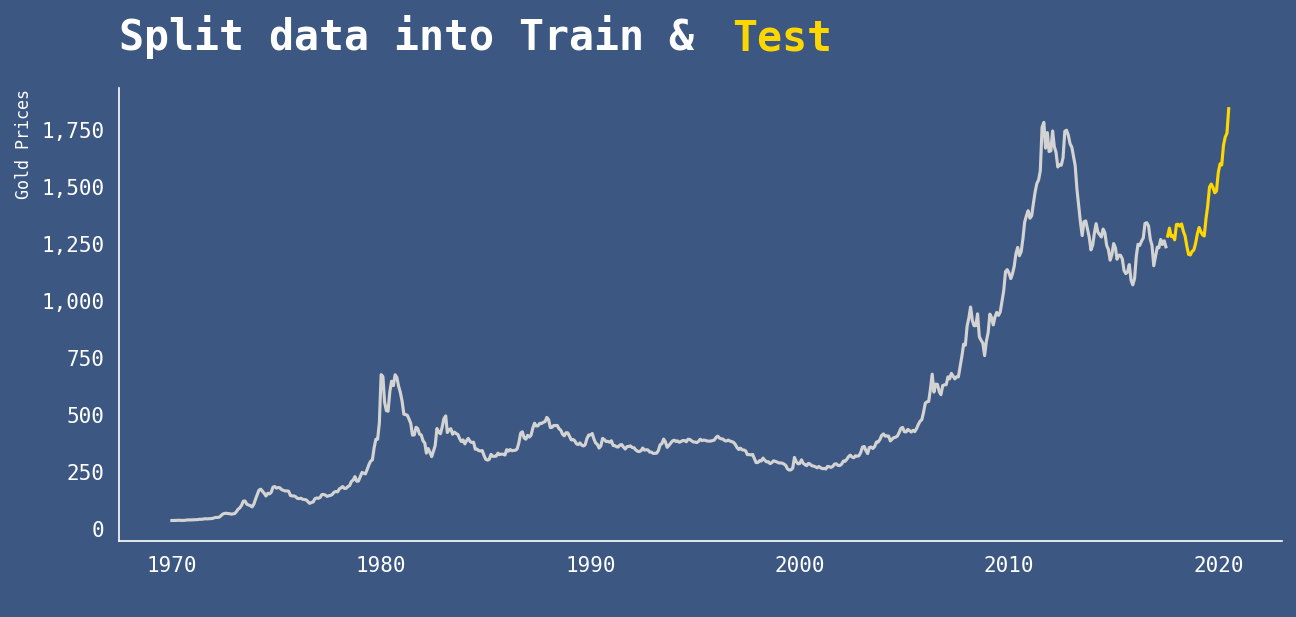

In [10]:
fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

sns.lineplot(ax=ax0, x=train_df.index, y='y', data=train_df,color='lightgray')
sns.lineplot(ax=ax0, x=test_df.index, y='y', data=test_df,color='gold')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylabel("Gold Prices",fontsize=8,loc='top', fontfamily='monospace')
ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')

    
ax0.text(Xstart, 2100, 'Split data into Train & ',fontsize=20, fontweight='bold')
ax0.text(Xstart+10700, 2100, 'Test',color='gold',fontsize=20, fontweight='bold')

plt.xticks(rotation=0)

plt.show()

# Next we call & fit the model

Fit model on the training set only

In [11]:
model = Prophet()
model.fit(train_df.reset_index())

Now we can **make our predictions**

In [12]:
# Predict on test set 
test_preds = model.predict(df=test_df.reset_index())

In [13]:
train_test_combined_df = train_df.join(test_preds.set_index(['ds'])[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

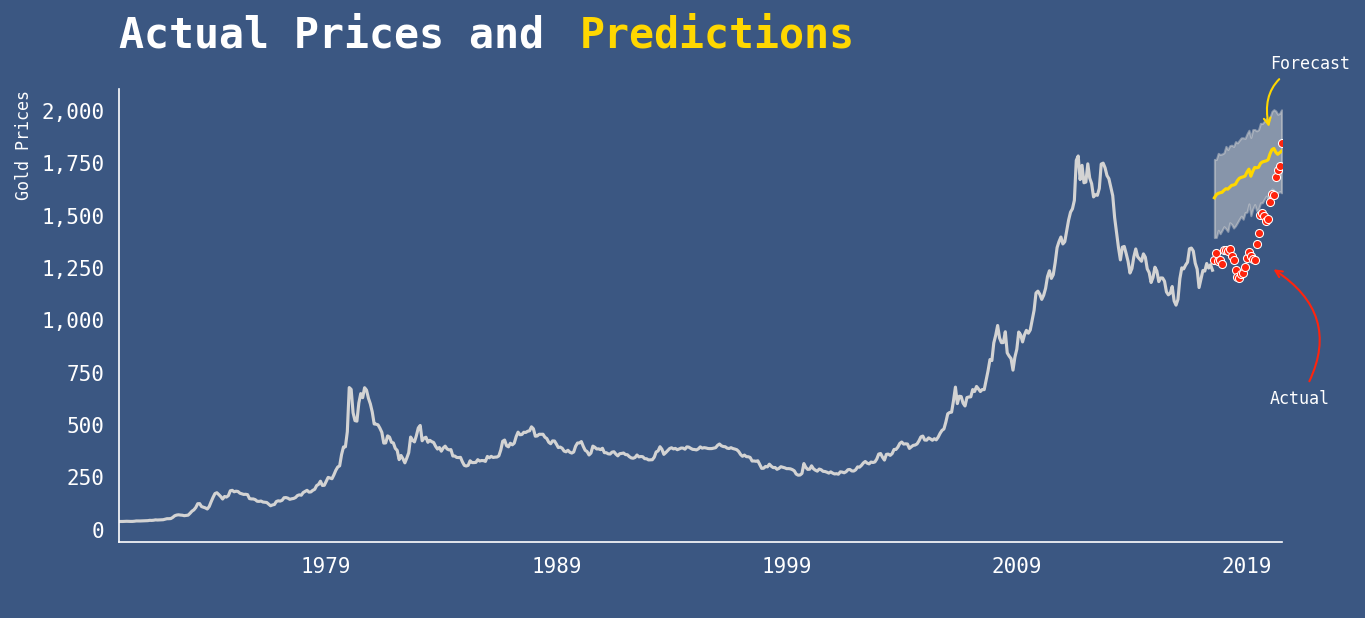

In [14]:
fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

train_test_combined_df[['y','yhat']].plot(ax=ax0, color=['lightgray','gold'],legend=False)
ax0.fill_between(train_test_combined_df.index, train_test_combined_df['yhat_upper'], train_test_combined_df['yhat_lower'], alpha=0.5, color='lightgray')
ax0.scatter(test_df.index, test_df['y'], color='#FF240D',ec='white', linewidth=0.5, s=15)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylabel("Gold Prices",fontsize=8,loc='top', fontfamily='monospace')
ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')

    
ax0.text(Xstart, 2300, 'Actual Prices and',fontsize=20, fontweight='bold')
ax0.text(Xstart+240, 2300, 'Predictions',color='gold',fontsize=20, fontweight='bold')

plt.annotate('Forecast', xy=(600, 1900), xytext=(600, 2200),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.5",color='gold'), fontsize=8,fontfamily='monospace',ha='left', color='white')
plt.annotate('Actual', xy=(600, 1250), xytext=(600, 600),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.5",color='#FF240D'), fontsize=8,fontfamily='monospace',ha='left', color='white')

plt.xticks(rotation=0)

plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


print('Our error metrics: ')
mae = mean_absolute_error(y_true=test_df['y'], y_pred=test_preds['yhat'])
print(f'MSE: {mae}')

mse = mean_squared_error(y_true=test_df['y'], y_pred=test_preds['yhat'])
rmse = sqrt(mse)
print(f'RMSE: {rmse}')

Our error metrics: 
MSE: 309.2859825862828
RMSE: 328.8390858068998


So our model did'nt do terribly. It forecasted the upwards trend, and ended up close to the maximum price acheived. However, it wasn't great. This could (and should) be tuned.

**I'll now do a forecast ahead of where we are at present**.

# Forecast

For this, I will choose 60 months, or **5 years**. Of course, this is way in to the future, and the further out we go from the present, the less reliable our predictions become. 

I just want to show the functionality.

In [16]:
# fit the model on the whole dataset
model = Prophet()
model.fit(df_prophet)

In [17]:
# Choose forecast window, in this case, 60 months
future = model.make_future_dataframe(periods=60, freq='m')

In [18]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
662,2025-02-28,"1,498.609348750321","1,323.0549762911157","1,659.3024062919758"
663,2025-03-31,"1,545.4614382968873","1,382.1468489095053","1,716.1465351297738"
664,2025-04-30,"1,575.3102817434885","1,396.5373445617445","1,739.81307101922"
665,2025-05-31,"1,568.4038836189866","1,391.3377512528489","1,737.6626791770327"
666,2025-06-30,"1,554.002626023712","1,373.4272055519339","1,719.0201424186155"


We've now produced our predictions.

Let's join them with our original dataframe so we can **plot them together...**

In [19]:
combined_df = df_prophet.set_index(['ds']).join(forecast.set_index(['ds'])[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

# How do our predictions perform?

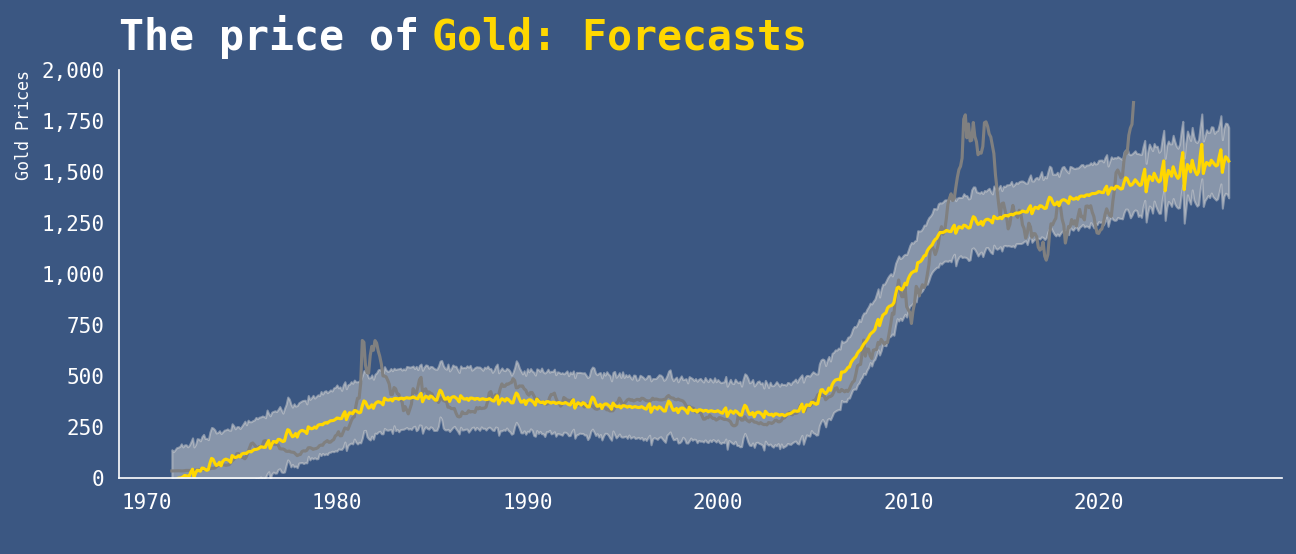

In [20]:
fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

combined_df[['y','yhat']].plot(ax=ax0, color=['gray','gold'],legend=False)
ax0.fill_between(combined_df.index, combined_df['yhat_upper'], combined_df['yhat_lower'], alpha=0.5, color='lightgray')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,2000])
#ax0.set_xlim(1970,2025)
ax0.set_ylabel("Gold Prices",fontsize=8,loc='top', fontfamily='monospace')
ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')

    
ax0.text(Xstart, 2100, 'The price of',fontsize=20, fontweight='bold')
ax0.text(Xstart+6000, 2100, 'Gold: Forecasts',color='gold',fontsize=20, fontweight='bold')

#L = ax0.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.15, 0.7), ncol= 1)
#plt.setp(L.texts, family='monospace')
#L.get_frame().set_facecolor('none')
#L.get_texts()[0].set_text('Actual Value')
#L.get_texts()[1].set_text('Predictions')


plt.xticks(rotation=0)

plt.show()

We see above that our **predictions actually did quite well.** 

They didn't predict every movement, far from it, however the **general trends** over the years were picked up. 

The prediction 3 years in to the future is showing a consistent trend. Let's focus on our future predictions specifically...

In [21]:
df1970.set_index('Date',inplace=True)
df1970.index = pd.to_datetime(df1970.index) 
connect_date = df1970.index[-2] 

In [22]:
forecast = forecast.set_index(['ds'])

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]
preds_df = df1970.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

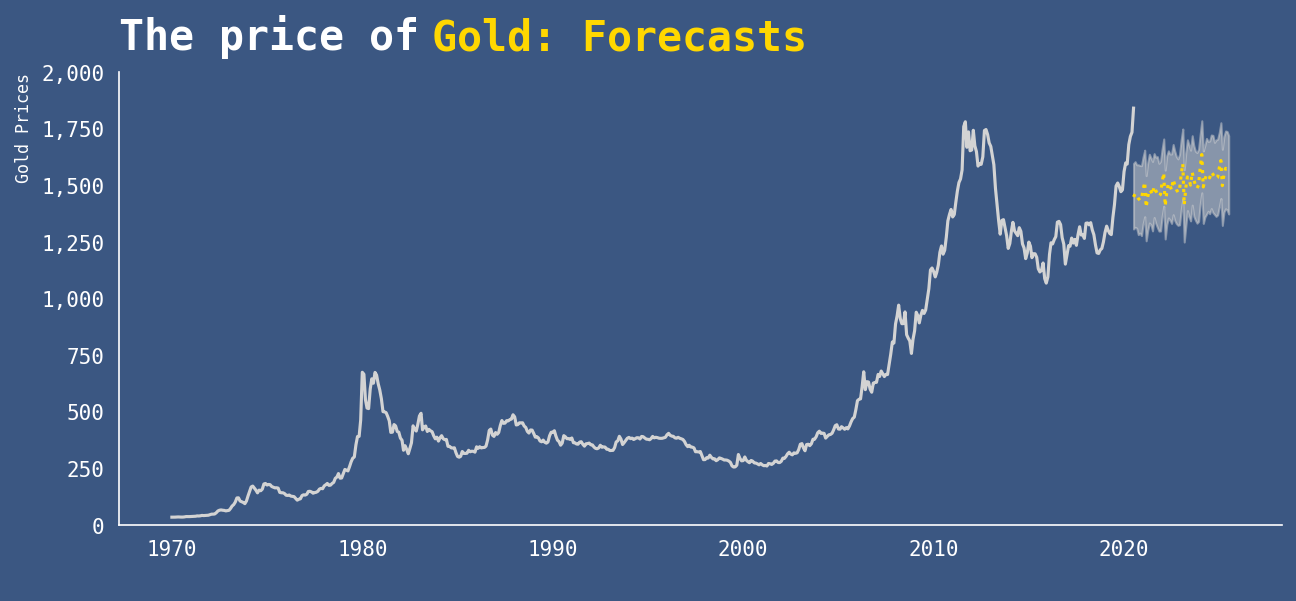

In [23]:
fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)



ax0.plot(preds_df['Price'], color='lightgray')
ax0.plot(preds_df['yhat'], color='gold', linestyle=':')
ax0.fill_between(preds_df.index, preds_df['yhat_upper'], preds_df['yhat_lower'], alpha=0.5, color='lightgray')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,2000])
#ax0.set_xlim(1970,2025)
ax0.set_ylabel("Gold Prices",fontsize=8,loc='top', fontfamily='monospace')
ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')
ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ["left","bottom"]:
    ax0.spines[s].set_color('white')

    
ax0.text(Xstart, 2100, 'The price of',fontsize=20, fontweight='bold')
ax0.text(Xstart+6000, 2100, 'Gold: Forecasts',color='gold',fontsize=20, fontweight='bold')


plt.xticks(rotation=0)

plt.show()

We now have our **forecast clearly highlighted**

We can see that the predictions follow the general trend of the data, despite not following directly on from the current price.

# Black Gold

There is another eartlhy product that also has power all over the world, and it is also known as **Black Gold**... yes, that's right, **Oil**

**Have the prices of Gold & Oil tracked through the years?**

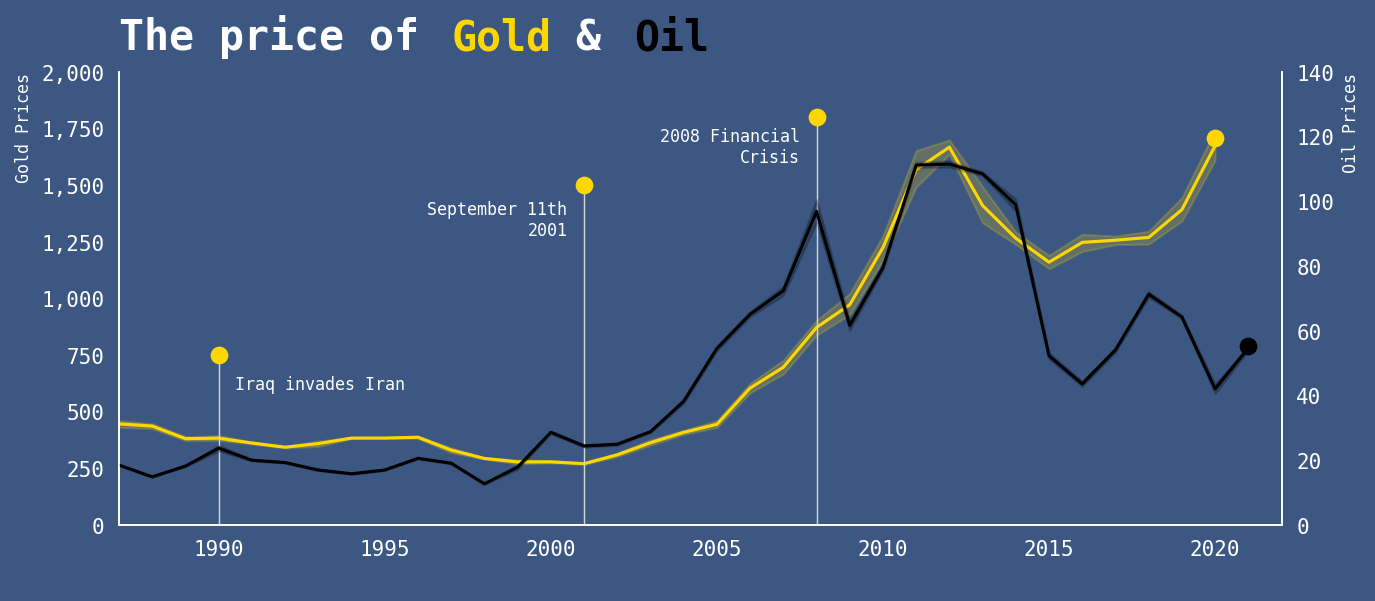

In [24]:
df1970 = df[df['Year']>=1987]

fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

sns.lineplot(x='Year',y='Price',data=df1970,color='gold', ax=ax0)

ax1 = plt.twinx()
sns.lineplot(x='Year',y='Price',data=oil,color='black', ax=ax1)

for s in [ "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

for s in ["left","right","bottom"]:
    ax0.spines[s].set_color('white')
    ax1.spines[s].set_color('white')


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,2000])
ax1.set_ylim([0,140])

ax0.set_xlim(1987,2022)
ax0.set_ylabel("Gold Prices",fontsize=8,loc='top', fontfamily='monospace')
ax1.set_ylabel("Oil Prices",fontsize=8,loc='top', fontfamily='monospace')

ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')


ax0.tick_params(axis = "both", which = "both", left=False, bottom=False)
ax1.tick_params(axis = "both", which = "both", left=False, bottom=False, right=False)

ax0.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


    
ax0.text(1987, 2100, 'The price of',fontsize=20, fontweight='bold')
ax0.text(1997, 2100, 'Gold',color='gold',fontsize=20, fontweight='bold')
ax0.text(2000.75, 2100, '&',fontsize=20, fontweight='bold')
ax0.text(2002.5, 2100, 'Oil',color='black',fontsize=20, fontweight='bold')


# Ball
ax0.plot(2020,df['Price'].max()-130, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)
ax1.plot(2021,oil['Price'][-1:], 'ko', markersize=7, fillstyle='full',color='black', markeredgewidth=1.5)

# highlights

ax0.axvline(x=2001, ymin=0, ymax=0.74, color='lightgray',linewidth=0.7)
ax0.plot(2001,1500, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)
ax0.text(2000.5,1280,'September 11th\n2001',ha='right',fontsize=8)


ax0.axvline(x=1990, ymin=0, ymax=0.365, color='lightgray',linewidth=0.7)
ax0.plot(1990,750, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)
ax0.text(1990.5,600,'Iraq invades Iran',ha='left',fontsize=8)

ax0.axvline(x=2008, ymin=0, ymax=0.88, color='lightgray',linewidth=0.7)
ax0.plot(2008,1800, 'ko', markersize=7, fillstyle='full',color='gold', markeredgewidth=1.5)
ax0.text(2007.5,1600,'2008 Financial\nCrisis',ha='right',fontsize=8)


plt.show()

The prices of Gold & Oil, while on different scales, have **tracked closely together** for many years. 

It could be said that **oil prices seem a bit more volatile** than gold, but largely, the two remain closely aligned.


We can also plot the price of Oil and the price of Gold temporally. With the price of each on an axis, and the years plotted, showing how each changed.

**I'll focus on the period after 2002 when both Oil & Gold appear to increase together**

In [25]:
df1970['M_Yr'] = df1970['Date'].dt.to_period('Y')
oil['M_Yr'] = oil['Date'].dt.to_period('Y')

oil_mean_m_yr = oil.groupby('M_Yr')['Price'].mean()
gold_mean_m_yr = df1970.groupby('M_Yr')['Price'].mean()

gold_oil_df = pd.merge(left=gold_mean_m_yr, right=oil_mean_m_yr, left_on='M_Yr', right_on='M_Yr')

gold_oil_df.columns = [['Gold', 'Oil']]

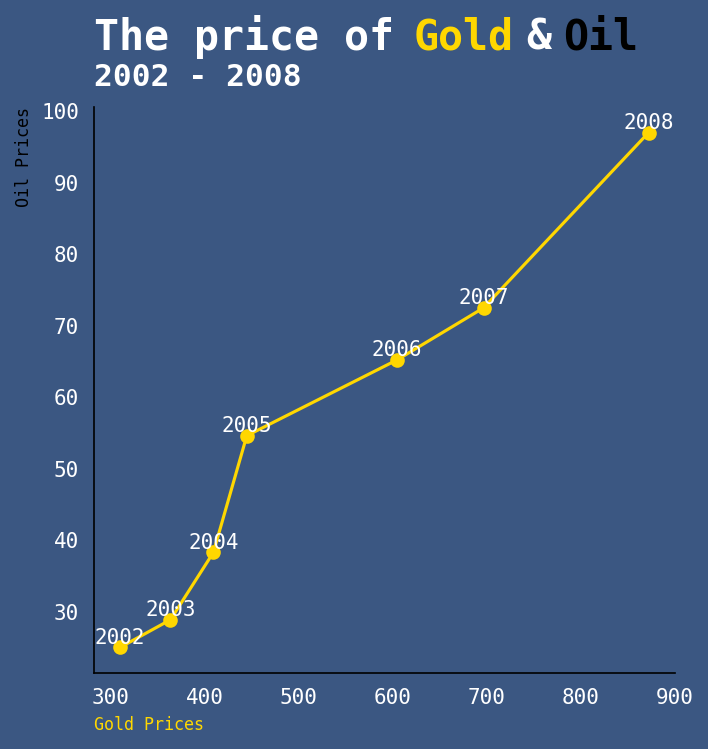

In [26]:
fig = plt.figure(figsize=(5,5),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])


fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 

c1 = 'Gold'
c2 = 'Oil'

# filtet dates
gold_oil_df = gold_oil_df.loc['2002-01-01':'2008-01-01']

plt.plot(gold_oil_df[c1], gold_oil_df[c2], '-', marker='o',color='gold')

for line in range(0, gold_oil_df.shape[0], 1):
     plt.annotate(
          gold_oil_df.index[line], 
          (gold_oil_df[c1].iloc[line], gold_oil_df[c2].iloc[line]+0.025) ,
          va='bottom',
          ha='center',fontfamily='monospace'
     )
        

for s in ['top','right']:
    ax0.spines[s].set_visible(False)
    
#ax0.xaxis.set_ticks(np.arange(1, 10, 1))
ax0.set_ylabel(f"{c2}",fontfamily='monospace',loc='top',color='gray')
ax0.set_xlabel(f"{c1}",fontfamily='monospace',loc='left',color='gray')
ax0.tick_params(axis = 'both', which = 'major', labelsize = 10)
    

ax0.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+8, 'The price of',fontsize=20, fontweight='bold')
ax0.text(Xstart+340, Yend+8, 'Gold',color='gold',fontsize=20, fontweight='bold')
ax0.text(Xstart+460, Yend+8, '&',fontsize=20, fontweight='bold')
ax0.text(Xstart+500, Yend+8, 'Oil',color='black',fontsize=20, fontweight='bold')


ax0.text(Xstart, Yend+3, '2002 - 2008',fontsize=15, fontweight='bold')



ax0.set_xlabel("Gold Prices",fontsize=8,loc='left',color='gold', fontfamily='monospace')
ax0.set_ylabel("Oil Prices",fontsize=8,loc='top',color='black', fontfamily='monospace')

plt.show()

Here the observation is clear, Oil & Gold increase in almost perfect unison between 2002 & 2008. 

What if we **extend our view to the present?** It certainly appears that **Oil gets more volatile** after 2008

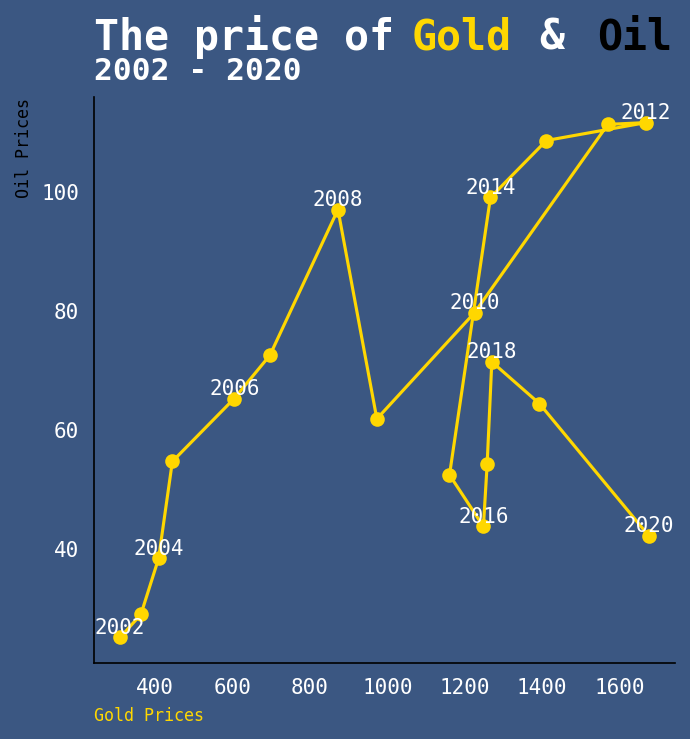

In [27]:
fig = plt.figure(figsize=(5,5),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])


fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 

c1 = 'Gold'
c2 = 'Oil'

gold_oil_df = pd.merge(left=gold_mean_m_yr, right=oil_mean_m_yr, left_on='M_Yr', right_on='M_Yr')
gold_oil_df.columns = [['Gold', 'Oil']]
gold_oil_df = gold_oil_df.loc['2002-01-01':]

plt.plot(gold_oil_df[c1], gold_oil_df[c2], '-', marker='o',color='gold')

for line in range(0, gold_oil_df.shape[0], 2):
     plt.annotate(
          gold_oil_df.index[line], 
          (gold_oil_df[c1].iloc[line], gold_oil_df[c2].iloc[line]+0.025) ,
          va='bottom',
          ha='center',fontfamily='monospace'
     )
        

for s in ['top','right']:
    ax0.spines[s].set_visible(False)
    
#ax0.xaxis.set_ticks(np.arange(1, 10, 1))
ax0.set_ylabel(f"{c2}",fontfamily='monospace',loc='top',color='gray')
ax0.set_xlabel(f"{c1}",fontfamily='monospace',loc='left',color='gray')
ax0.tick_params(axis = 'both', which = 'major', labelsize = 10)
    

ax0.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+8, 'The price of',fontsize=20, fontweight='bold')
ax0.text(Xstart+820, Yend+8, 'Gold',color='gold',fontsize=20, fontweight='bold')
ax0.text(Xstart+1150, Yend+8, '&',fontsize=20, fontweight='bold')
ax0.text(Xstart+1300, Yend+8, 'Oil',color='black',fontsize=20, fontweight='bold')


ax0.text(Xstart, Yend+3, '2002 - 2020',fontsize=15, fontweight='bold')



ax0.set_xlabel("Gold Prices",fontsize=8,loc='left',color='gold', fontfamily='monospace')
ax0.set_ylabel("Oil Prices",fontsize=8,loc='top',color='black', fontfamily='monospace')

plt.show()

We now see that the close **relationship is not as strong** in the years following 2008. 

This, of course, was the year of the global financial crisis, and perhaps oil was hit harder than gold.

So although the two remain closely linked, the relationship is not as strong as it was in the past.

# Conclusions

So what conclusions can we draw?

Well, gold has consistently risen in price since 1970. There have been years where gold has decreased in price, but the overall trend can firmly be said to be an upward one. 

We used Prophet to try to predict the price of gold. A notoriously difficult task. 

Our model didn't do brilliantly at predicting exact movements, but it did pick up overall trends quite well.

So if history, and our model, are anything to go by, gold prices are - generally speaking - heading **up!**


# Resources

Some resources & references I found useful for this notebook:

* https://nextjournal.com/eric-brown/forecasting-with-prophet-part-3

* https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

* https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet#Train/Test-Split